# Content

## Input variables (based on physicochemical tests):
1 - fixed acidity

2 - volatile acidity

3 - citric acid

4 - residual sugar

5 - chlorides

6 - free sulfur dioxide

7 - total sulfur dioxide

8 - density

9 - pH

10 - sulphates

11 - alcohol
## Output variable (based on sensory data):

12 - quality (score between 0 and 10)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"C:\Users\Shanm\OneDrive\Desktop\winequality-red.csv")

In [3]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [6]:
df.shape

(1599, 12)

In [7]:
X=df[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']]

y=df['quality']



In [8]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [9]:
y.head

<bound method NDFrame.head of 0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64>

# splitting the data

In [10]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=40)

In [11]:
print(X_train.shape)

print(X_test.shape)

print(y_train.shape)

print(y_test.shape)


(1279, 11)
(320, 11)
(1279,)
(320,)


# data preprocessing

In [12]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

X_train_trans = pd.DataFrame(scaler.fit_transform(X_train), 
                                    columns = X_train.columns, 
                                    index = X_train.index)


X_train_trans.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
919,0.047519,0.517807,-0.781635,-0.515703,-0.314108,2.147441,-0.015561,-0.908117,0.434617,1.372432,1.300132
223,0.163063,0.657140,-0.116117,-0.379762,-0.082215,-0.764125,-0.566296,0.734363,-0.209951,-0.339577,-0.396865
994,0.971873,-0.986984,0.907758,-0.039911,0.107516,0.400502,1.269487,1.278336,-1.047888,-1.343168,-0.962531
918,0.047519,-0.931251,0.242240,-0.243822,-0.124377,1.565128,0.994119,-0.189862,-0.081037,0.368840,0.545911
1171,-0.703520,0.350608,-1.395960,-0.243822,-0.187621,0.982815,-0.076754,-0.813054,0.692444,0.132701,0.357356


In [13]:
X_test_trans=pd.DataFrame(scaler.fit_transform(X_test), 
                                    columns = X_test.columns, 
                                    index = X_test.index)

X_test_trans.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1035,0.996835,-0.906709,0.394633,-0.052593,-0.104193,-0.984922,-0.870153,0.072396,-0.896268,-0.062802,0.155870
49,-1.533470,-1.245171,0.550731,-0.940709,-0.346440,-0.351313,1.475618,-0.696958,0.097515,-0.475345,-1.136080
799,0.603232,-0.173374,0.394633,1.013146,-0.170261,-0.984922,-0.959233,1.078475,-0.101242,-0.828953,0.248153
538,2.571247,-1.019530,1.175120,2.967001,-0.522619,-0.984922,-0.335673,2.531102,-0.697511,-0.003868,1.447821
660,-0.633806,-0.060553,-1.010242,-0.940709,-0.346440,-0.984922,-0.781073,0.325261,0.097515,0.880152,-0.766952


# DATA TRAINING

# KNN

In [25]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train_trans, y_train)

KNeighborsClassifier()

In [32]:
y_test_predict = classifier.predict(X_test_trans)

In [33]:
from sklearn import metrics

metrics.accuracy_score(y_test,y_test_predict)

0.596875

# logistic regression

In [45]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_trans, y_train)

LogisticRegression()

In [46]:
y_test_pred=classifier.predict(X_test_trans)

In [48]:
from sklearn import metrics
metrics.accuracy_score(y_test,y_test_pred)

0.6125

# decision tree classifier

In [54]:
from sklearn.tree import DecisionTreeClassifier

classifier=DecisionTreeClassifier(max_depth=3)

classifier.fit(X_train_trans,y_train)

DecisionTreeClassifier(max_depth=3)

In [55]:
y_test_predict=classifier.predict(X_test_trans)

In [56]:
metrics.accuracy_score(y_test,y_test_predict)

0.571875

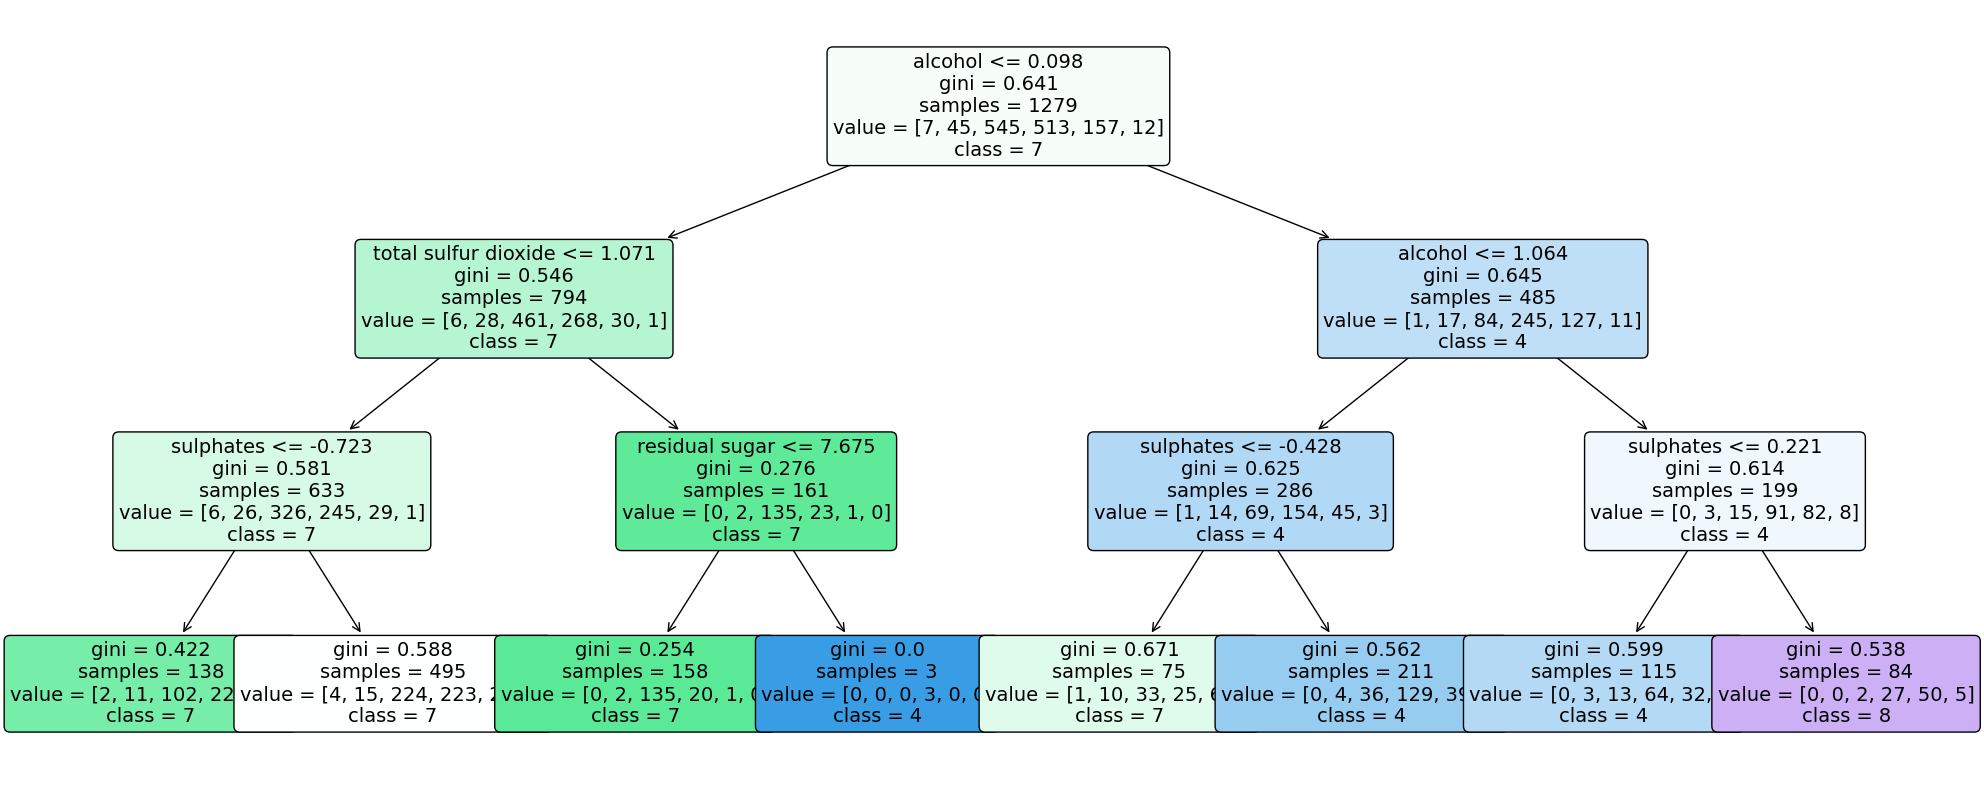

In [70]:
from sklearn.tree import plot_tree

plt.figure(figsize=(25,10))

f = plot_tree(classifier,feature_names=X_train.columns, 
              class_names=["6","5","7","4","8","3"], 
              filled = True, 
              rounded = True, 
              fontsize = 14)
plt.show()

In [66]:
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
919,8.4,0.620,0.12,1.8,0.072,38.0,46.0,0.99504,3.38,0.89,11.8
223,8.6,0.645,0.25,2.0,0.083,8.0,28.0,0.99815,3.28,0.60,10.0
994,10.0,0.350,0.45,2.5,0.092,20.0,88.0,0.99918,3.15,0.43,9.4
918,8.4,0.360,0.32,2.2,0.081,32.0,79.0,0.99640,3.30,0.72,11.0
1171,7.1,0.590,0.00,2.2,0.078,26.0,44.0,0.99522,3.42,0.68,10.8


In [67]:
y_train.head()

919     6
223     6
994     5
918     6
1171    6
Name: quality, dtype: int64

In [68]:
y_train.unique()

array([6, 5, 7, 4, 8, 3], dtype=int64)